# Importation des bibliothèques

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from modele import Module
from sequentiel import Sequentiel , Optim
from loss  import MSELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt

import non_lineaire as nl
from sklearn.model_selection import train_test_split

# Génération des données

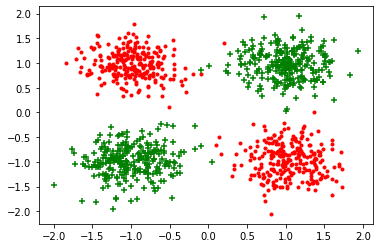

In [3]:
data, y = ut.gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=1,epsilon=0.01)
y = np.where(y==-1,0,1).reshape((-1,1))


ut.plot_data(data,y)

# Test du module sequentiel

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)
print("X ", data.shape)
print('Train :', X_train.shape)
print('Test :', X_test.shape)

X  (1000, 2)
Train : (800, 2)
Test : (200, 2)


In [5]:
# Fonction de coût 
loss = MSELoss()

# Prametres de l'optimiser
batch_size = 20
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=2, output_size=50,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=50, output_size=1,biais=True)
activation_sigmoide = nl.Sigmoide()

network = Sequentiel([module1 , activation_tanh , module2 ,activation_sigmoide])



optimiser = Optim(network , loss , eps = eps)
losses = optimiser.SGD(X_train , y_train , batch_size , epochs)



In [6]:
print(losses)

[0.29910380097182, 0.265723611990237, 0.24803857450388325, 0.23216153611751555, 0.21879660697388886, 0.20753740843924212, 0.19753041549176958, 0.18820294147622463, 0.17927881064365744, 0.17065051198277964, 0.16228971919441262, 0.15420135248574754, 0.14640213186086337, 0.1389108259471779, 0.13174385358239646, 0.12491338837349417, 0.11842671175683935, 0.11228623637967214, 0.10648990244293763, 0.10103177231167419, 0.09590271058481517, 0.09109107465213258, 0.08658336738672404, 0.0823648233464783, 0.07841991434243227, 0.07473277044293755, 0.07128751924728105, 0.06806855035619438, 0.06506071408829439, 0.06224946423301939, 0.05962095446558226, 0.05716209733731485, 0.05486059375525152, 0.052704939756149385, 0.0506844162776114, 0.0487890666013024, 0.047009665226391315, 0.04533768113924362, 0.04376523777798789, 0.04228507143965564, 0.040890489430695016, 0.039575328904735384, 0.038333917050501765, 0.037161033074667706, 0.03605187225753576, 0.035002012233679033, 0.03400738155656772, 0.033064230538

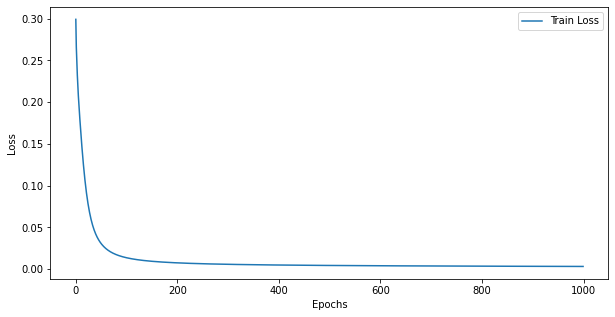

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



### Visualisation de la frontière sur les données de test :

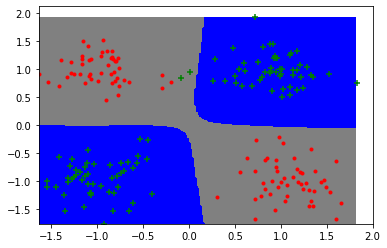

In [9]:
def predict(x) :
    return np.where(optimiser._net.forward(x) >= 0.5,1, 0)

plt.figure()
ut.plot_frontiere(X_test, predict, step=200)
ut.plot_data(X_test, y_test)
plt.show()

### Visualisation de la frontière sur l'ensemble des données :

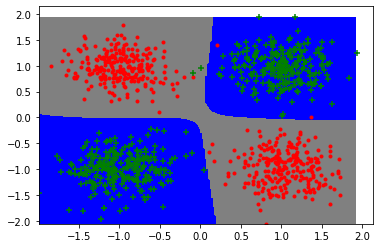

In [10]:
def predict(x) :
    return np.where(optimiser._net.forward(x) >= 0.5,1, 0)

plt.figure()
ut.plot_frontiere(data, predict, step=200)
ut.plot_data(data, y)
plt.show()